# Demand Prediction

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_csv('metroregion_filtered_data.csv')


In [4]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Display columns with missing values (if any)
print("Missing Values in Dataset:")
print(missing_values[missing_values > 0])


Missing Values in Dataset:
Series([], dtype: int64)


In [5]:
# Check unique values in categorical columns
print("Unique values in 'Metroregion_name':", data['Metroregion_name'].nunique())
print("Unique values in 'EFPG_name':", data['EFPG_name'].nunique())


print("\nExample values in 'Metroregion_name':", data['Metroregion_name'].unique()[:5])
print("\nExample values in 'EFPG_name':", data['EFPG_name'].unique()[:5])


Unique values in 'Metroregion_name': 10
Unique values in 'EFPG_name': 10

Example values in 'Metroregion_name': ['Atlanta-Sandy Springs-Roswell  GA' 'Boston-Cambridge-Newton  MA-NH'
 'Chicago-Naperville-Elgin  IL-IN-WI' 'Dallas-Fort Worth-Arlington  TX'
 'Detroit-Warren-Dearborn  MI']

Example values in 'EFPG_name': ['Whole milk' 'Cheese and cream cheese'
 'Beef, pork, lamb, veal and game, fresh'
 'Bacon, sausage, and lunch meats' 'Egg and egg substitutes']


Correlations with Target (Purchase_grams_wtd):
Purchase_grams_wtd        1.000000
Purchase_grams_unwtd      0.969495
Purchase_dollars_wtd      0.632625
Purchase_dollars_unwtd    0.436336
Number_stores             0.306181
labor force               0.243889
employment                0.242586
unemployment              0.223177
unemployment rate         0.039063
Price_index_GEKS         -0.124711
Unit_value_se_wtd        -0.272691
Unit_value_mean_wtd      -0.430798
Unit_value_mean_unwtd    -0.436887
Name: Purchase_grams_wtd, dtype: float64


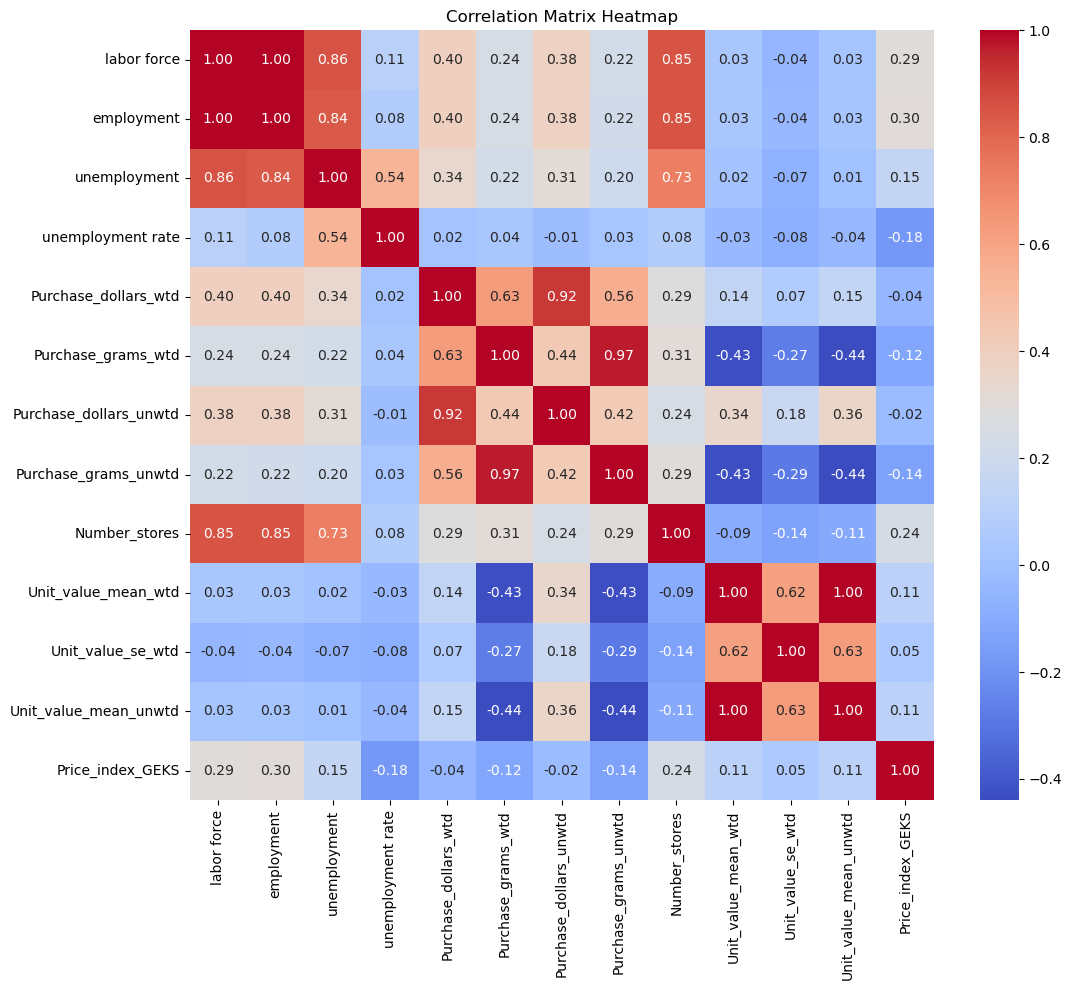

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude irrelevant columns from numerical data
columns_to_exclude = ['EFPG_name', 'EFPG_code','Month', 'Metroregion_code','Year']
numerical_data = data.drop(columns=columns_to_exclude, errors='ignore').select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Focus on correlations with the target variable
target_correlation = correlation_matrix['Purchase_grams_wtd']

# Display correlations with the target variable sorted by absolute value
print("Correlations with Target (Purchase_grams_wtd):")
print(target_correlation.sort_values(ascending=False))

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


# # Correlation Results:


### Correlation with the Target (Purchase_grams_wtd):
labor force: 0.24 (moderate correlation)

unemployment: 0.22 (moderate correlation)

unemployment rate: 0.04 (very weak correlation)

### Correlation Between Features:

labor force and unemployment: 0.86 (highly correlated, redundant)

labor force and unemployment rate: 0.11 (low correlation, no redundancy)

unemployment and unemployment rate: 0.54 (moderate correlation, some overlap

In [7]:
from scipy.stats import f_oneway

# Perform ANOVA for EFPG_name
categories = data['EFPG_name'].unique()
anova_results_efpg = f_oneway(*(data[data['EFPG_name'] == cat]['Purchase_grams_wtd'] for cat in categories))
print("ANOVA results for EFPG_name:", anova_results_efpg)

# Perform ANOVA for Metroregion_name
regions = data['Metroregion_name'].unique()
anova_results_regions = f_oneway(*(data[data['Metroregion_name'] == region]['Purchase_grams_wtd'] for region in regions))
print("ANOVA results for Metroregion_name:", anova_results_regions)


ANOVA results for EFPG_name: F_onewayResult(statistic=3160.318993602929, pvalue=0.0)
ANOVA results for Metroregion_name: F_onewayResult(statistic=67.72611737249578, pvalue=5.697385858588223e-121)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['EFPG_name', 'Metroregion_name'], drop_first=True)

# Define features (X) and target (y)
X = data_encoded[['labor force', 'unemployment', 'Price_index_GEKS', 
                  'Unit_value_mean_wtd', 'Number_stores'] + 
                 [col for col in data_encoded.columns if 'EFPG_name_' in col or 'Metroregion_name_' in col]]
y = data_encoded['Purchase_grams_wtd']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
X_train

,labor force,unemployment,Price_index_GEKS,Unit_value_mean_wtd,Number_stores,EFPG_name_All other caloric beverages,"EFPG_name_Bacon, sausage, and lunch meats","EFPG_name_Beef, pork, lamb, veal and game, fresh",EFPG_name_Cheese and cream cheese,EFPG_name_Egg and egg substitutes,...,EFPG_name_Whole milk,Metroregion_name_Boston-Cambridge-Newton MA-NH,Metroregion_name_Chicago-Naperville-Elgin IL-IN-WI,Metroregion_name_Dallas-Fort Worth-Arlington TX,Metroregion_name_Detroit-Warren-Dearborn MI,Metroregion_name_Houston-The Woodlands-Sugar Land TX,Metroregion_name_Los Angeles-Long Beach-Anaheim CA,Metroregion_name_Miami-Fort Lauderdale-West Palm Beach FL,Metroregion_name_New York-Newark-Jersey City NY-NJ-PA,Metroregion_name_Philadelphia-Camden-Wilmington PA-NJ-DE-MD
8121,6651888,332794,0.943823,0.438,1442,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2484,3055175,159077,1.036195,0.938,501,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
893,2940393,161379,0.985315,1.146,1060,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4436,4971481,229683,1.007174,0.755,1341,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7299,6728406,263677,1.010024,0.154,1629,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,9860429,693497,1.039029,0.347,2451,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5191,1648301,55907,1.060624,0.364,831,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5390,2016110,196859,1.001099,0.337,782,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
860,2789094,206378,0.980021,1.150,876,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


## $\color{ForestGreen}{\text{Linear Regression}}$

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred_li = linear_model.predict(X_train)
y_test_pred_li = linear_model.predict(X_test)

# Evaluate the model on the training set
train_mse_li = mean_squared_error(y_train, y_train_pred_li)
train_mae_li = mean_absolute_error(y_train, y_train_pred_li)
train_r2_li = r2_score(y_train, y_train_pred_li)

# Evaluate the model on the testing set
test_mse_li = mean_squared_error(y_test, y_test_pred_li)
test_mae_li = mean_absolute_error(y_test, y_test_pred_li)
test_r2_li = r2_score(y_test, y_test_pred_li)

# Print scores for both training and testing datasets
print("Linear Regression Model Performance:")
print("\nTraining Set:")
print(f"Mean Squared Error (MSE): {train_mse_li:.2f}")
print(f"Mean Absolute Error (MAE): {train_mae_li:.2f}")
print(f"R-squared (R²): {train_r2_li:.2f}")

print("\nTesting Set:")
print(f"Mean Squared Error (MSE): {test_mse_li:.2f}")
print(f"Mean Absolute Error (MAE): {test_mae_li:.2f}")
print(f"R-squared (R²): {test_r2_li:.2f}")


Linear Regression Model Performance:

Training Set:
Mean Squared Error (MSE): 57205631461792645120.00
Mean Absolute Error (MAE): 5029069101.90
R-squared (R²): 0.86

Testing Set:
Mean Squared Error (MSE): 49575292506725900288.00
Mean Absolute Error (MAE): 4821896977.51
R-squared (R²): 0.84


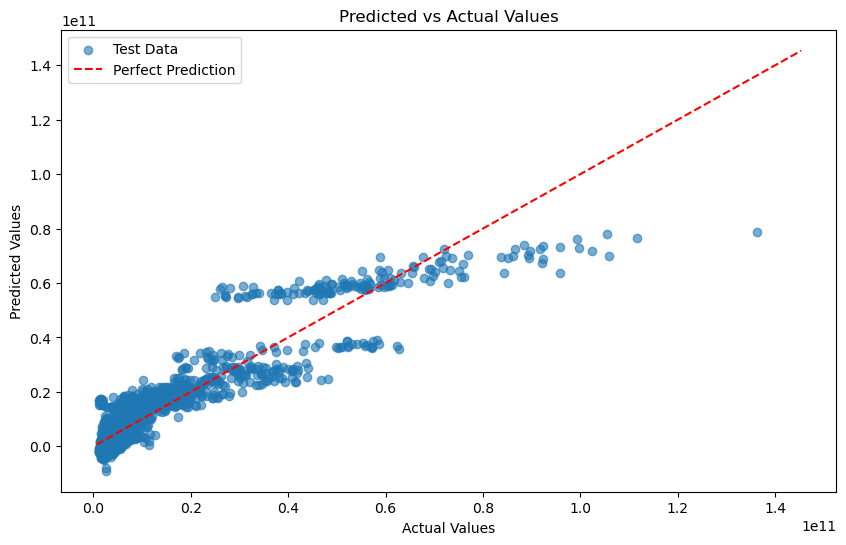

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_li, alpha=0.6, label="Test Data")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


## $\color{ForestGreen}{\text{Decision Tree}}$

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],  # Try different depths for the tree
    'min_samples_split': [2, 10, 20],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 5, 10]  # Minimum samples required to be at a leaf node
}

# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Set up Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, 
                           cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation R² Score:", best_score)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation R² Score: 0.9752442151573428


In [55]:
# Retrieve the best model from grid search
best_tree_model = grid_search.best_estimator_

# Make predictions on the training and test sets
y_train_pred_dt = best_tree_model.predict(X_train)
y_test_pred_dt = best_tree_model.predict(X_test)

# Calculate metrics on the training set
train_mae_dt = mean_absolute_error(y_train, y_train_pred_dt)
train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
train_r2_dt = r2_score(y_train, y_train_pred_dt)

# Calculate metrics on the test set
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

# Display results
print("Optimized Model - Training Set Performance:")
print(f"Mean Absolute Error (MAE): {train_mae_dt}")
print(f"Mean Squared Error (MSE): {train_mse_dt}")
print(f"R-squared (R²): {train_r2_dt}")

print("\nOptimized Model - Test Set Performance:")
print(f"Mean Absolute Error (MAE): {test_mae_dt}")
print(f"Mean Squared Error (MSE): {test_mse_dt}")
print(f"R-squared (R²): {test_r2_dt}")


Optimized Model - Training Set Performance:
Mean Absolute Error (MAE): 833496890.637062
Mean Squared Error (MSE): 3.202244590309788e+18
R-squared (R²): 0.9920871469812776

Optimized Model - Test Set Performance:
Mean Absolute Error (MAE): 1381365798.4783697
Mean Squared Error (MSE): 8.391707182524987e+18
R-squared (R²): 0.9737101923144262


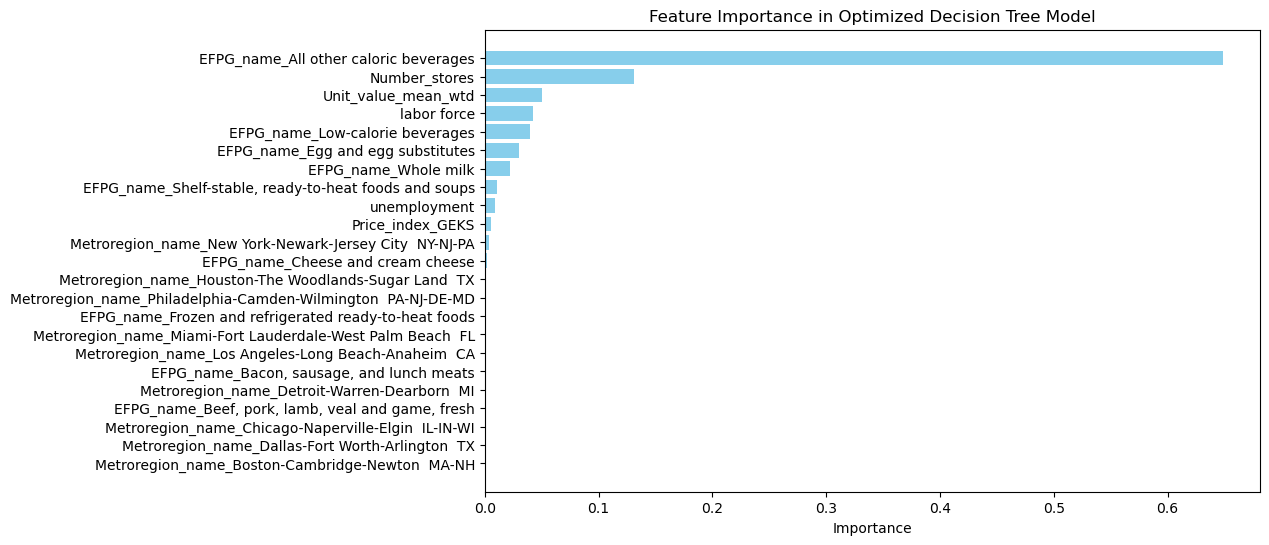

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the best model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_tree_model.feature_importances_
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Optimized Decision Tree Model')
plt.gca().invert_yaxis()  # To display the highest importance feature at the top
plt.show()


## $\color{ForestGreen}{\text{Bagged Decision Trees Regressor}}$

In [57]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [58]:
# Initialize the base Decision Tree Regressor
base_tree = DecisionTreeRegressor(
    max_depth=15,           
    min_samples_split=2,
    min_samples_leaf=5,
    random_state=42
)

# Set up the Bagging Regressor with the Decision Tree as the base estimator
bagging_model = BaggingRegressor(
    base_estimator=base_tree,
    n_estimators=100,       # Number of trees in the bagging ensemble
    random_state=42,
    n_jobs=-1              
)

# Fit the bagging model to the training data
bagging_model.fit(X_train, y_train)


C:\Users\lokes\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
                                                      min_samples_leaf=5,
                                                      random_state=42),
                 n_estimators=100, n_jobs=-1, random_state=42)

In [59]:
# Make predictions on the training and test sets
y_train_pred_bagging = bagging_model.predict(X_train)
y_test_pred_bagging = bagging_model.predict(X_test)

# Calculate metrics for the training set
train_mae_bagging = mean_absolute_error(y_train, y_train_pred_bagging)
train_mse_bagging = mean_squared_error(y_train, y_train_pred_bagging)
train_r2_bagging = r2_score(y_train, y_train_pred_bagging)

# Calculate metrics for the test set
test_mae_bagging = mean_absolute_error(y_test, y_test_pred_bagging)
test_mse_bagging = mean_squared_error(y_test, y_test_pred_bagging)
test_r2_bagging = r2_score(y_test, y_test_pred_bagging)

# Display results
print("Bagging Applied to Decision Tree - Training Set Performance:")
print(f"Mean Absolute Error (MAE): {train_mae_bagging}")
print(f"Mean Squared Error (MSE): {train_mse_bagging}")
print(f"R-squared (R²): {train_r2_bagging}")

print("\nBagging Applied to Decision Tree - Test Set Performance:")
print(f"Mean Absolute Error (MAE): {test_mae_bagging}")
print(f"Mean Squared Error (MSE): {test_mse_bagging}")
print(f"R-squared (R²): {test_r2_bagging}")


Bagging Applied to Decision Tree - Training Set Performance:
Mean Absolute Error (MAE): 882559525.2223735
Mean Squared Error (MSE): 3.460042821178704e+18
R-squared (R²): 0.991450118968013

Bagging Applied to Decision Tree - Test Set Performance:
Mean Absolute Error (MAE): 1210872591.3208065
Mean Squared Error (MSE): 6.177937984915726e+18
R-squared (R²): 0.9806455590043639


Feature Importances in Bagging Regressor:
                                              Feature  Importance
5               EFPG_name_All other caloric beverages    0.650512
4                                       Number_stores    0.089647
0                                         labor force    0.084313
3                                 Unit_value_mean_wtd    0.061230
11                    EFPG_name_Low-calorie beverages    0.039392
9                   EFPG_name_Egg and egg substitutes    0.020676
2                                    Price_index_GEKS    0.015406
12  EFPG_name_Shelf-stable, ready-to-heat foods an...    0.013286
1                                        unemployment    0.010218
13                               EFPG_name_Whole milk    0.006358
8                   EFPG_name_Cheese and cream cheese    0.002246
22  Metroregion_name_Philadelphia-Camden-Wilmingto...    0.001623
21  Metroregion_name_New York-Newark-Jersey City  ...    0.001621
18  Metroregion_name_Houston-The W

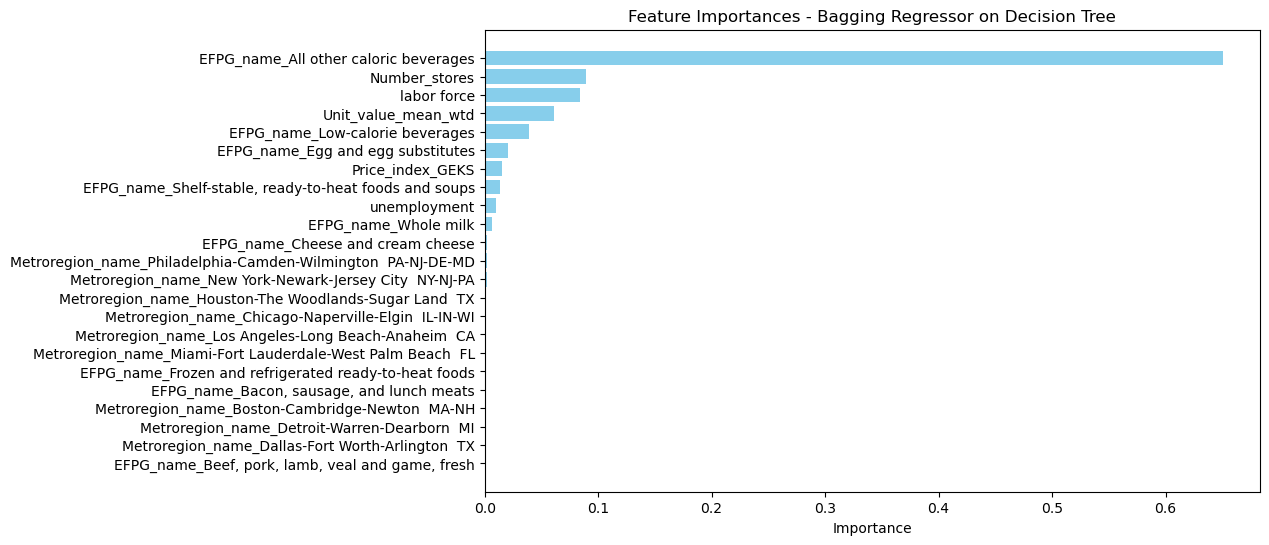

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from each Decision Tree in the Bagging ensemble
all_importances = np.array([tree.feature_importances_ for tree in bagging_model.estimators_])

# Calculate the mean feature importance across all trees
mean_importances = np.mean(all_importances, axis=0)

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': mean_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print("Feature Importances in Bagging Regressor:")
print(feature_importances_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importances - Bagging Regressor on Decision Tree")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


## Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,       
    max_depth=15,           
    min_samples_split=2,    
    min_samples_leaf=5,     
    random_state=42,
    n_jobs=-1               
)

# Fit the Random Forest model to the training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, min_samples_leaf=5, n_jobs=-1,
                      random_state=42)

In [12]:
# Make predictions on the training and test sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate metrics for the training set
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# Calculate metrics for the test set
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Display results
print("Random Forest - Training Set Performance:")
print(f"Mean Absolute Error (MAE): {train_mae_rf}")
print(f"Mean Squared Error (MSE): {train_mse_rf}")
print(f"R-squared (R²): {train_r2_rf}")

print("\nRandom Forest - Test Set Performance:")
print(f"Mean Absolute Error (MAE): {test_mae_rf}")
print(f"Mean Squared Error (MSE): {test_mse_rf}")
print(f"R-squared (R²): {test_r2_rf}")


Random Forest - Training Set Performance:
Mean Absolute Error (MAE): 882305350.9648751
Mean Squared Error (MSE): 3.4580174516749773e+18
R-squared (R²): 0.9914551237235024

Random Forest - Test Set Performance:
Mean Absolute Error (MAE): 1210537842.3797312
Mean Squared Error (MSE): 6.173317103945291e+18
R-squared (R²): 0.9806600354475248


Top Features by Importance:
                                              Feature  Importance
5               EFPG_name_All other caloric beverages    0.650512
4                                       Number_stores    0.089326
0                                         labor force    0.083989
3                                 Unit_value_mean_wtd    0.061967
11                    EFPG_name_Low-calorie beverages    0.039392
9                   EFPG_name_Egg and egg substitutes    0.020279
2                                    Price_index_GEKS    0.015744
12  EFPG_name_Shelf-stable, ready-to-heat foods an...    0.013286
1                                        unemployment    0.010346
13                               EFPG_name_Whole milk    0.005680


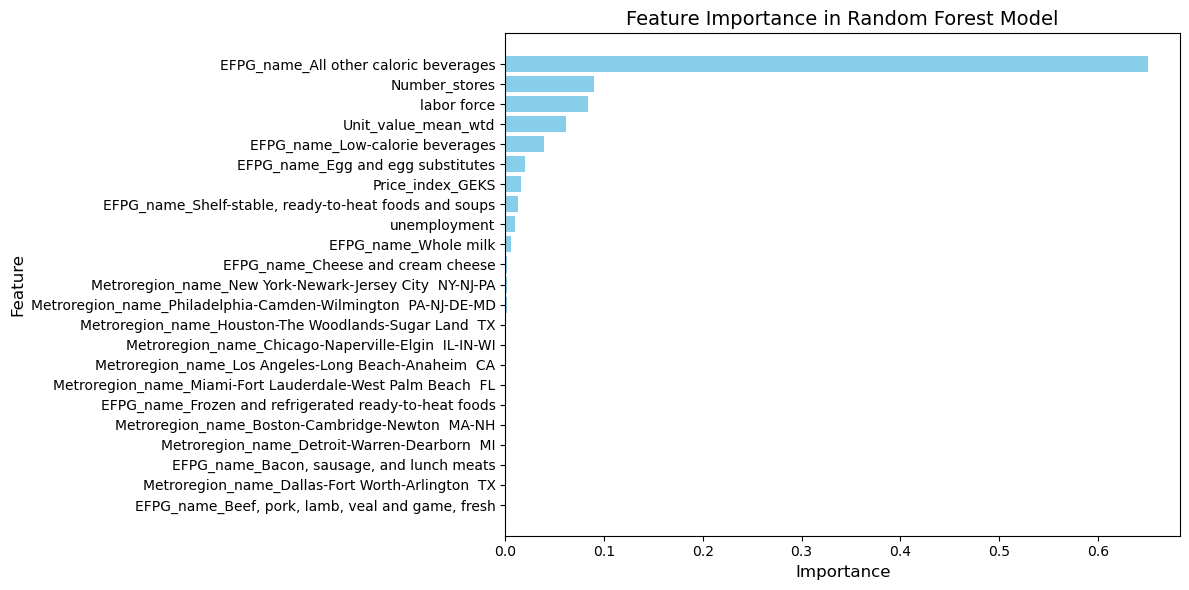

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Extract feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features by Importance:")
print(feature_importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(
    feature_importance_df['Feature'], 
    feature_importance_df['Importance'], 
    color='skyblue'
)
plt.gca().invert_yaxis()  # Reverse the order of features
plt.title('Feature Importance in Random Forest Model', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


## $\color{ForestGreen}{\text{Gradient Boosting}}$

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(
    n_estimators=100,  # Number of boosting stages
    learning_rate=0.1,  # Shrinkage rate
    max_depth=3,       # Maximum depth of each tree
    random_state=42
)

# Train the model
gbr_model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred_gbr = gbr_model.predict(X_train)
y_test_pred_gbr = gbr_model.predict(X_test)

# Evaluate the model
train_mae_gbr = mean_absolute_error(y_train, y_train_pred_gbr)
train_mse_gbr = mean_squared_error(y_train, y_train_pred_gbr)
train_r2_gbr = r2_score(y_train, y_train_pred_gbr)

test_mae_gbr = mean_absolute_error(y_test, y_test_pred_gbr)
test_mse_gbr = mean_squared_error(y_test, y_test_pred_gbr)
test_r2_gbr = r2_score(y_test, y_test_pred_gbr)

# Print results
print("Gradient Boosting Regressor - Training Set Performance:")
print(f"Mean Absolute Error (MAE): {train_mae_gbr:.2f}")
print(f"Mean Squared Error (MSE): {train_mse_gbr:.2f}")
print(f"R-squared (R²): {train_r2_gbr:.2f}")

print("\nGradient Boosting Regressor - Test Set Performance:")
print(f"Mean Absolute Error (MAE): {test_mae_gbr:.2f}")
print(f"Mean Squared Error (MSE): {test_mse_gbr:.2f}")
print(f"R-squared (R²): {test_r2_gbr:.2f}")


Gradient Boosting Regressor - Training Set Performance:
Mean Absolute Error (MAE): 2449313017.07
Mean Squared Error (MSE): 17939510420046538752.00
R-squared (R²): 0.96

Gradient Boosting Regressor - Test Set Performance:
Mean Absolute Error (MAE): 2540768161.39
Mean Squared Error (MSE): 20282988200206581760.00
R-squared (R²): 0.94


In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 75, 100],        # Number of boosting stages
    'learning_rate': [0.05, 0.1, 0.2],   # Learning rate for shrinkage
    'max_depth': [3, 4, 5],              # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],     # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5]        # Minimum samples in a leaf node
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr, 
    param_grid=param_grid, 
    cv=5, 
    scoring='r2', 
    n_jobs=-1, 
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_gbr = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Make predictions on the training and test sets
y_train_pred_gbr_tuned = best_gbr.predict(X_train)
y_test_pred_gbr_tuned = best_gbr.predict(X_test)

# Evaluate the model
train_mae_gbr_tuned = mean_absolute_error(y_train, y_train_pred_gbr_tuned)
train_mse_gbr_tuned = mean_squared_error(y_train, y_train_pred_gbr_tuned)
train_r2_gbr_tuned = r2_score(y_train, y_train_pred_gbr_tuned)

test_mae_gbr_tuned = mean_absolute_error(y_test, y_test_pred_gbr_tuned)
test_mse_gbr_tuned = mean_squared_error(y_test, y_test_pred_gbr_tuned)
test_r2_gbr_tuned = r2_score(y_test, y_test_pred_gbr_tuned)

# Print results
print("\nTuned Gradient Boosting Regressor - Training Set Performance:")
print(f"Mean Absolute Error (MAE): {train_mae_gbr_tuned:.2f}")
print(f"Mean Squared Error (MSE): {train_mse_gbr_tuned:.2e}")
print(f"R-squared (R²): {train_r2_gbr_tuned:}")

print("\nTuned Gradient Boosting Regressor - Test Set Performance:")
print(f"Mean Absolute Error (MAE): {test_mae_gbr_tuned:.2f}")
print(f"Mean Squared Error (MSE): {test_mse_gbr_tuned:.2e}")
print(f"R-squared (R²): {test_r2_gbr_tuned:}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

Tuned Gradient Boosting Regressor - Training Set Performance:
Mean Absolute Error (MAE): 976258162.78
Mean Squared Error (MSE): 2.73e+18
R-squared (R²): 0.9932625162777634

Tuned Gradient Boosting Regressor - Test Set Performance:
Mean Absolute Error (MAE): 1313289565.39
Mean Squared Error (MSE): 6.13e+18
R-squared (R²): 0.9807947258543344


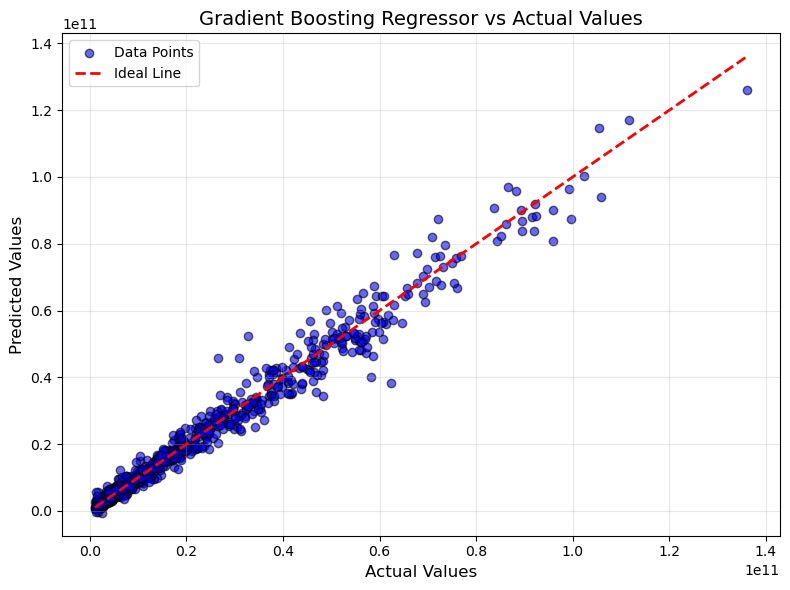

In [15]:
import matplotlib.pyplot as plt

# Plot predicted vs. actual values for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_gbr_tuned, alpha=0.6, color='blue', edgecolor='k', label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')

# Add titles and labels
plt.title('Gradient Boosting Regressor vs Actual Values', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)

# Add legend and grid
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()


## $\color{ForestGreen}{\text{XG Boost}}$

In [65]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,        # Number of boosting rounds
    learning_rate=0.1,       # Step size shrinkage
    max_depth=3,             # Maximum depth of a tree
    random_state=42,
    n_jobs=-1                # Use all cores
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)

test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

# Print results
print("XGBoost Regressor - Training Set Performance:")
print(f"Mean Absolute Error (MAE): {train_mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {train_mse_xgb:.2f}")
print(f"R-squared (R²): {train_r2_xgb:}")

print("\nXGBoost Regressor - Test Set Performance:")
print(f"Mean Absolute Error (MAE): {test_mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {test_mse_xgb:.2f}")
print(f"R-squared (R²): {test_r2_xgb:}")


XGBoost Regressor - Training Set Performance:
Mean Absolute Error (MAE): 2489205213.28
Mean Squared Error (MSE): 18516039330292854784.00
R-squared (R²): 0.9542462502230924

XGBoost Regressor - Test Set Performance:
Mean Absolute Error (MAE): 2530045367.75
Mean Squared Error (MSE): 19205124183796523008.00
R-squared (R²): 0.9398335749344329


In [16]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of boosting rounds
    'learning_rate': [0.05, 0.1, 0.2],     # Step size shrinkage
    'max_depth': [3, 5, 7],                # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],         # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.8, 1.0],               # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0]         # Fraction of features used for each tree
}

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and the best model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Predict on training and test sets using the tuned model
y_train_pred_xgb_tuned = best_xgb_model.predict(X_train)
y_test_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Evaluate the model
train_mae_xgb_tuned = mean_absolute_error(y_train, y_train_pred_xgb_tuned)
train_mse_xgb_tuned = mean_squared_error(y_train, y_train_pred_xgb_tuned)
train_r2_xgb_tuned = r2_score(y_train, y_train_pred_xgb_tuned)

test_mae_xgb_tuned = mean_absolute_error(y_test, y_test_pred_xgb_tuned)
test_mse_xgb_tuned = mean_squared_error(y_test, y_test_pred_xgb_tuned)
test_r2_xgb_tuned = r2_score(y_test, y_test_pred_xgb_tuned)

# Print results
print("Best Parameters:", best_params)

print("\nTuned XGBoost Regressor - Training Set Performance:")
print(f"Mean Absolute Error (MAE): {train_mae_xgb_tuned:.2f}")
print(f"Mean Squared Error (MSE): {train_mse_xgb_tuned:.2e}")
print(f"R-squared (R²): {train_r2_xgb_tuned:.3f}")

print("\nTuned XGBoost Regressor - Test Set Performance:")
print(f"Mean Absolute Error (MAE): {test_mae_xgb_tuned:.2f}")
print(f"Mean Squared Error (MSE): {test_mse_xgb_tuned:.2e}")
print(f"R-squared (R²): {test_r2_xgb_tuned:.3f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}

Tuned XGBoost Regressor - Training Set Performance:
Mean Absolute Error (MAE): 276516802.54
Mean Squared Error (MSE): 1.55e+17
R-squared (R²): 1.000

Tuned XGBoost Regressor - Test Set Performance:
Mean Absolute Error (MAE): 1143388438.31
Mean Squared Error (MSE): 4.55e+18
R-squared (R²): 0.986


### "Category-Wise Evaluation of Random Forest Model: Individual EFPG Category as Test Data"

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Get the unique food categories from 'EFPG_name'
food_categories = data['EFPG_name'].unique()

# Dictionary to store results for each category
category_results = {}

# Loop through each category and calculate performance metrics
for category in food_categories:
    print(f"Evaluating for category: {category}")
    
    # Filter the data for the current category
    category_test_data = data[data['EFPG_name'] == category]
    
    # Transform the categorical columns using the fitted OneHotEncoder
    # Assuming encoder was already fitted on 'EFPG_name' and 'Metroregion_name' columns
    encoded_category_data = encoder.transform(category_test_data[['EFPG_name', 'Metroregion_name']])
    encoded_category_df = pd.DataFrame(encoded_category_data, columns=encoder.get_feature_names_out(['EFPG_name', 'Metroregion_name']))
    
    # Combine the encoded columns with the other features
    category_test_data_encoded = pd.concat([category_test_data.drop(['EFPG_name', 'Metroregion_name'], axis=1).reset_index(drop=True),
                                            encoded_category_df], axis=1)
    
    # Align the test data columns with the training set columns
    X_category_test = category_test_data_encoded[X_train.columns]  # Ensure columns match X_train
    y_category_test = category_test_data['Purchase_grams_wtd']  # Target variable for actual values

    # Make predictions using the trained model on the category subset
    category_predictions = rf_model.predict(X_category_test)

    # Calculate and store the metrics
    category_mae = mean_absolute_error(y_category_test, category_predictions)
    category_mse = mean_squared_error(y_category_test, category_predictions)
    category_r2 = r2_score(y_category_test, category_predictions)
    
    # Store results in the dictionary
    category_results[category] = {
        'MAE': category_mae,
        'MSE': category_mse,
        'R²': category_r2
    }

    # Print results for each category
    print(f"{category} - Test Performance:")
    print(f"Mean Absolute Error (MAE): {category_mae}")
    print(f"Mean Squared Error (MSE): {category_mse}")
    print(f"R-squared (R²): {category_r2}\n")

# Convert category_results to a DataFrame for better visualization
category_results_df = pd.DataFrame.from_dict(category_results, orient='index')




Evaluating for category: Whole milk
Whole milk - Test Performance:
Mean Absolute Error (MAE): 540224626.6103319
Mean Squared Error (MSE): 8.135712214839209e+17
R-squared (R²): 0.9717687705331635

Evaluating for category: Cheese and cream cheese
Cheese and cream cheese - Test Performance:
Mean Absolute Error (MAE): 196502064.36708465
Mean Squared Error (MSE): 1.3065196162497355e+17
R-squared (R²): 0.9469325969907045

Evaluating for category: Beef, pork, lamb, veal and game, fresh
Beef, pork, lamb, veal and game, fresh - Test Performance:
Mean Absolute Error (MAE): 425549530.81325406
Mean Squared Error (MSE): 4.187557622625165e+17
R-squared (R²): 0.9258153477838278

Evaluating for category: Bacon, sausage, and lunch meats
Bacon, sausage, and lunch meats - Test Performance:
Mean Absolute Error (MAE): 336423606.922051
Mean Squared Error (MSE): 3.265610668186191e+17
R-squared (R²): 0.9280523778268097

Evaluating for category: Egg and egg substitutes
Egg and egg substitutes - Test Performanc

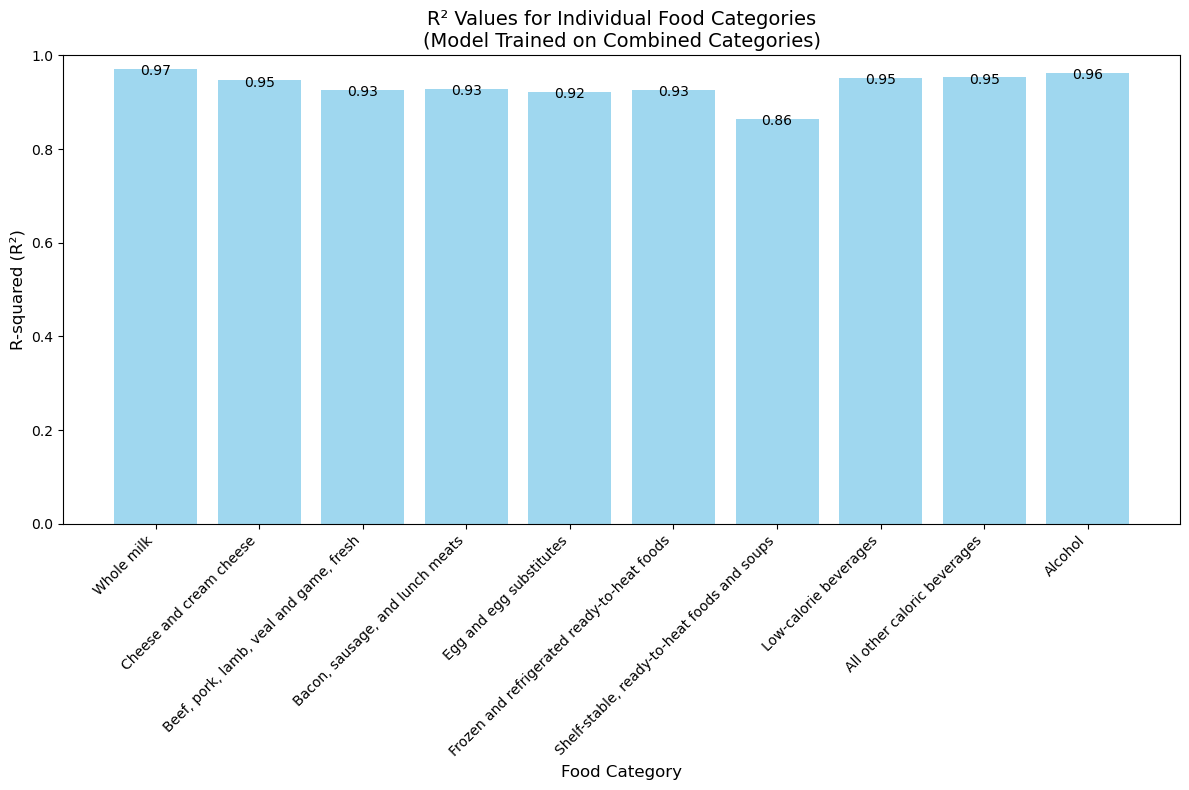

In [67]:
import matplotlib.pyplot as plt

# Define the specific order for the food categories as shown in the image
category_order = [
    "Whole milk", 
    "Cheese and cream cheese", 
    "Beef, pork, lamb, veal and game, fresh", 
    "Bacon, sausage, and lunch meats", 
    "Egg and egg substitutes", 
    "Frozen and refrigerated ready-to-heat foods", 
    "Shelf-stable, ready-to-heat foods and soups", 
    "Low-calorie beverages", 
    "All other caloric beverages", 
    "Alcohol"
]

# Reorder the DataFrame based on the defined order
category_results_sorted = category_results_df.reindex(category_order)

# Extract data for plotting
categories = category_results_sorted.index
r2_scores = category_results_sorted['R²']

# Create a bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(categories, r2_scores, color='skyblue', alpha=0.8)

# Add R² values on top of bars
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02,
             f"{score:.2f}", ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title("R² Values for Individual Food Categories\n(Model Trained on Combined Categories)", fontsize=14)
plt.xlabel("Food Category", fontsize=12)
plt.ylabel("R-squared (R²)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 1)  # R² is between 0 and 1

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Price elasticity

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


file_path = 'metroregion_filtered_data.csv'
metropolitan_data = pd.read_csv(file_path)

# Ensure 'Date' column is in datetime format
metropolitan_data['Date'] = pd.to_datetime(
    metropolitan_data['Year'].astype(str) + '-' + metropolitan_data['Month'].astype(str) + '-01'
)

# Encode categorical variables
data_encoded = pd.get_dummies(
    metropolitan_data, 
    columns=['EFPG_name', 'Metroregion_name'], 
    drop_first=True
)

# Define features (X) and target (y)
X = data_encoded[['labor force', 'unemployment rate', 'Price_index_GEKS', 
                  'Unit_value_mean_wtd', 'Number_stores'] + 
                 [col for col in data_encoded.columns if 'EFPG_name_' in col or 'Metroregion_name_' in col]]
y = data_encoded['Purchase_grams_wtd']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Simulated PED Calculation Function
def calculate_ped_simulation(efpg_name, metroregion_name, date_1, date_2):
    # Filter data for the specified EFPG_name and Metroregion_name
    filtered_data = metropolitan_data[
        (metropolitan_data["EFPG_name"] == efpg_name) &
        (metropolitan_data["Metroregion_name"] == metroregion_name)
    ]
    
    # Check if both dates are present in the filtered data
    if date_1 not in filtered_data["Date"].values or date_2 not in filtered_data["Date"].values:
        print(f"One or both dates ({date_1}, {date_2}) are not available in the data for the specified inputs.")
        return None
    
    # Extract rows for the two dates
    row_11 = filtered_data[filtered_data["Date"] == date_2].iloc[0]  # Use values from date_2 (2018-11-01)
    row_12 = filtered_data[filtered_data["Date"] == date_1].iloc[0]  # Actual values from date_1 (2018-12-01)

    # Modify feature values for prediction
    modified_input = row_11.copy()
    modified_input["Unit_value_mean_wtd"] *= 1.01  # Simulate a 1% price increase
    
    # Encode categorical variables for prediction
    encoded_data = pd.get_dummies(filtered_data, columns=["EFPG_name", "Metroregion_name"], drop_first=True)
    encoded_data = encoded_data.reindex(columns=X_train.columns, fill_value=0)
    
    # Prepare input for prediction
    modified_input_encoded = encoded_data.loc[[row_11.name]].copy()
    modified_input_encoded["Unit_value_mean_wtd"] *= 1.01  # Update price feature
    
    # Predict demand for simulated input
    predicted_demand_simulated = rf_model.predict(modified_input_encoded)[0]
    actual_demand_date_2 = row_11["Purchase_grams_wtd"]
    
    # Calculate percentage changes
    price_percentage_change = 0.10 # 1% increase
    demand_percentage_change = (predicted_demand_simulated - actual_demand_date_2) / actual_demand_date_2
    
    # Compute PED
    if price_percentage_change == 0:
        print("Price percentage change is zero; PED cannot be calculated.")
        return None
    
    ped = demand_percentage_change / price_percentage_change
    
    # Return the results
    result = {
        "Modified Input (2018-12-01)": modified_input_encoded.to_dict(),
        "Actual Demand (2018-11-01)": actual_demand_date_2,
        "Predicted Demand (2018-12-01)": predicted_demand_simulated,
        "Percentage Changes": {
            "Demand Percentage Change": demand_percentage_change,
            "Price Percentage Change": price_percentage_change
        },
        "PED": ped
    }
    
    return result

# Example Usage
efpg_name_input = "Whole milk"
metroregion_name_input = "'Atlanta-Sandy Springs-Roswell  GA'"
date_1_input = pd.to_datetime("2018-12-01")
date_2_input = pd.to_datetime("2018-11-01")
ped_simulation_result = calculate_ped_simulation(efpg_name_input, metroregion_name_input, date_1_input, date_2_input)

if ped_simulation_result:
    print("\nSimulated PED Calculation Results:")
    for key, value in ped_simulation_result.items():
        print(f"{key}: {value}")


One or both dates (2018-12-01 00:00:00, 2018-11-01 00:00:00) are not available in the data for the specified inputs.


# Individual PED Simulation

## **Data Preparation**
- Filtered the dataset for a specific `EFPG_name` (product category) and `Metroregion_name` (location).
- Checked if the required dates (`date_1` and `date_2`) existed in the filtered data.

## **Feature Adjustment**
- Simulated a **1% price increase** by modifying the `Unit_value_mean_wtd` column for the specified date.

## **Prediction**
- Encoded categorical variables using **one-hot encoding** to match the training dataset structure.
- Used the **trained Random Forest Regressor** to predict the demand (`Purchase_grams_wtd`) for the modified input.

## **Percentage Changes**
- Calculated the **demand percentage change** between the predicted and actual demand for the given date.
- Used the simulated **price percentage change** (1% increase).

## **PED Calculation**
- Divided the **demand percentage change** by the **price percentage change** to compute PED.

## **Result Aggregation**
- Stored the calculated PED alongside modified input data and other relevant metrics.


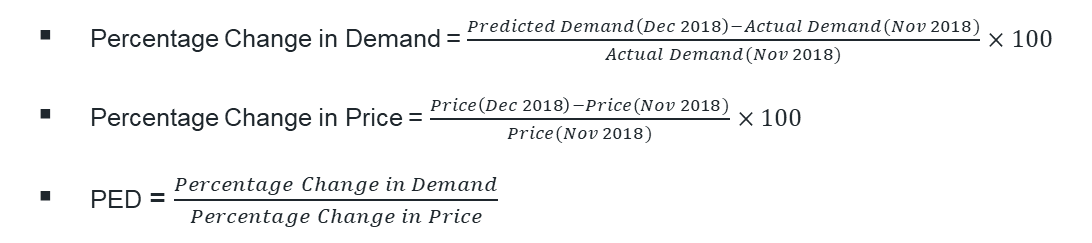

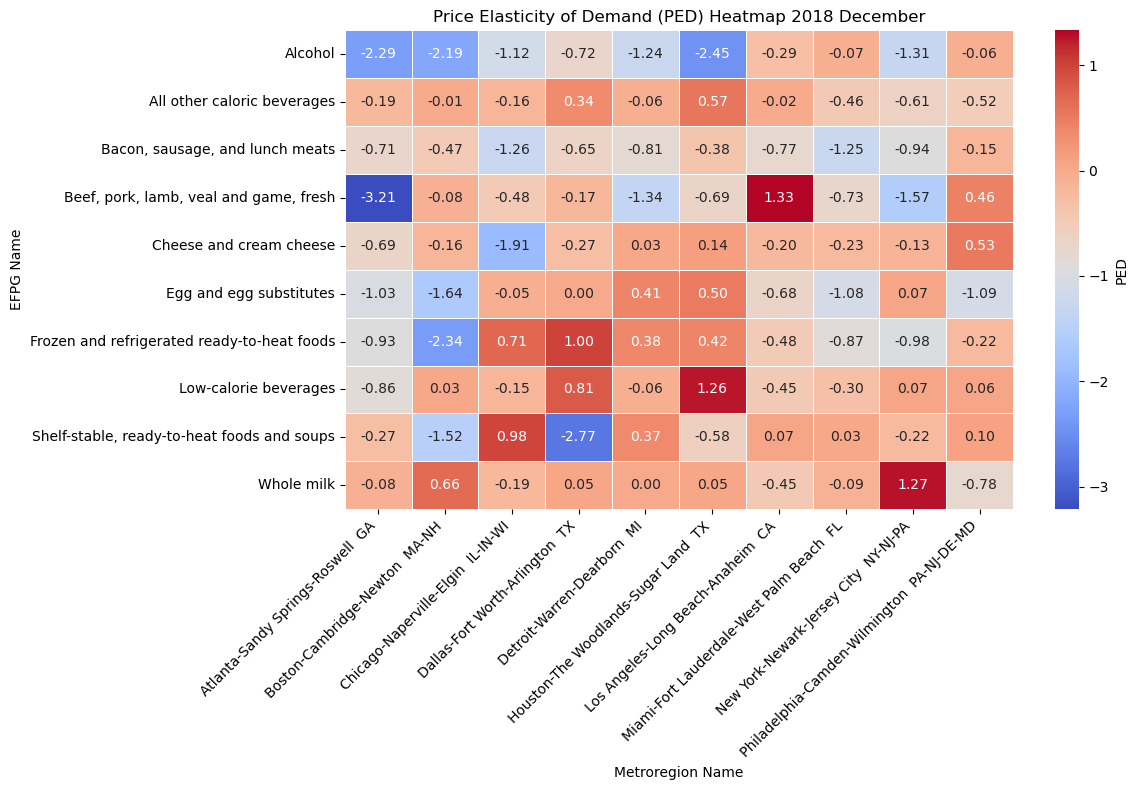

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate PED for all EFPG_name and Metroregion_name combinations
def calculate_ped_all():
    # Unique EFPG_name and Metroregion_name combinations
    efpg_names = metropolitan_data['EFPG_name'].unique()
    metroregion_names = metropolitan_data['Metroregion_name'].unique()
    
    # List to store results
    ped_results_list = []
    
    for efpg_name in efpg_names:
        for metroregion_name in metroregion_names:
            # Filter data for the specific EFPG_name, Metroregion_name, and Year 2018
            filtered_data = metropolitan_data[
                (metropolitan_data['EFPG_name'] == efpg_name) & 
                (metropolitan_data['Metroregion_name'] == metroregion_name) & 
                (metropolitan_data['Year'] == 2018)
            ]
            
            
            if filtered_data.empty:
                continue
            
            # Sort data by date
            filtered_data = filtered_data.sort_values(by='Date')
            
            # Encode categorical variables for prediction
            encoded_data = pd.get_dummies(filtered_data, columns=['EFPG_name', 'Metroregion_name'], drop_first=True)
            
            # Ensure the columns match the training dataset
            encoded_data = encoded_data.reindex(columns=X_train.columns, fill_value=0)
            
            # Predict demand
            filtered_data['Predicted_Demand'] = rf_model.predict(encoded_data)
            filtered_data['Actual_Price'] = filtered_data['Unit_value_mean_wtd']
            
            # Calculate percentage changes
            filtered_data['Price_Percentage_Change'] = filtered_data['Actual_Price'].pct_change()
            filtered_data['Demand_Percentage_Change'] = filtered_data['Predicted_Demand'].pct_change()
            
            # Compute PED
            filtered_data['PED'] = filtered_data['Demand_Percentage_Change'] / filtered_data['Price_Percentage_Change']
            
            # Drop rows with NaN or infinite PED values
            filtered_data = filtered_data.dropna(subset=['PED'])
            filtered_data = filtered_data.replace([float('inf'), -float('inf')], None).dropna(subset=['PED'])
            
            if not filtered_data.empty:
                ped = filtered_data['PED'].median()
                ped_results_list.append({
                    'EFPG_name': efpg_name,
                    'Metroregion_name': metroregion_name,
                    'PED': ped
                })
    
    # Convert the results to a DataFrame
    ped_results_df = pd.DataFrame(ped_results_list)
    return ped_results_df

# Calculate PED for all combinations
ped_results = calculate_ped_all()

# Pivot data for heatmap
heatmap_data = ped_results.pivot_table(
    index='EFPG_name',
    columns='Metroregion_name',
    values='PED',
    aggfunc='median'
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'PED'}
)
plt.title("Price Elasticity of Demand (PED) Heatmap 2018 December")
plt.xlabel("Metroregion Name")
plt.ylabel("EFPG Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Observations from Price Elasticity of Demand (PED) Heatmap

## **1. Variability Across Categories**
- PED varies significantly across different food categories (`EFPG Name`), indicating that consumer responsiveness to price changes differs depending on the product.

## **2. Highly Elastic Products**
- Categories like **Beef, pork, lamb, veal, and game, fresh** and **Alcohol** show high negative elasticity values in certain regions, indicating that demand is highly sensitive to price changes for these products.

## **3. Positive PED Values**
- Some products, such as **Whole milk** and **Low-calorie beverages**, show positive PED values in specific metro regions.
- This may indicate a scenario where a price increase leads to an unusual demand increase, potentially due to unique regional market dynamics.

## **4. Regional Differences**
- Metro regions like **Atlanta-Sandy Springs-Roswell, GA** and **Detroit-Warren-Dearborn, MI** demonstrate more negative PED values for several categories, suggesting stronger demand sensitivity compared to other regions.

## **5. Inelastic Products**
- Categories such as **Cheese and cream cheese** and **Shelf-stable, ready-to-heat foods and soups** show relatively lower PED values, suggesting that demand for these products is less affected by price changes.

## **6. Significant Regional Elasticity**
- Some regions, such as **Houston-The Woodlands-Sugar Land, TX**, exhibit variability in PED values across categories, showing a mix of elastic and inelastic behaviors for different products.

## **7. Extreme PED Values**
- Certain combinations, such as **Beef, pork, lamb, veal, and game, fresh** in **Miami-Fort Lauderdale-West Palm Beach, FL**, show extreme PED values.
- These highlight markets where demand is unusually sensitive to price changes.

## **8. Insights for Retailers**
- Retailers can leverage this analysis to tailor pricing strategies for specific regions and categories to:
  - Maximize revenue.
  - Stabilize demand.

This heatmap provides a comprehensive view of consumer behavior across regions and product categories, offering insights into market-specific demand dynamics.
